In [1]:
import sys 
sys.path.append('..')
import os
print (os.environ['CONDA_DEFAULT_ENV'])

from solinv.environment import InvariantEnvironment
from solinv.tyrell.interpreter import InvariantInterpreter
from solinv.tyrell import spec as S
from solinv.tyrell import dsl as D

from solinv.tyrell.dsl.utils import derive_dfs, get_hole_dfs

base


In [2]:
import os
os.path

<module 'posixpath' from '/usr/local/anaconda3/lib/python3.8/posixpath.py'>

In [3]:
spec = S.parse_file("../dsls/abstract0.tyrell")
start_type = spec.get_type("Expr")
builder = D.Builder( spec )
interpreter = InvariantInterpreter()

In [5]:
contracts = [
        # ("./benchmarks/mint_MI.sol", "0.5.17"),
        ("../benchmarks/easy/0x1ccaa0f2a7210d76e1fdec740d5f323e2e1b1672.sol", "0.4.26"), # stovars: 9
        ("../benchmarks/easy/0x28b5e12cce51f15594b0b91d5b5adaa70f684a02.sol", "0.4.26"), # stovars: 9
        ("../benchmarks/easy/0x6704b673c70de9bf74c8fba4b4bd748f0e2190e1.sol", "0.4.26"), # stovars: 8
        ("../benchmarks/easy/0x6745fab6801e376cd24f03572b9c9b0d4edddccf.sol", "0.4.26"), # stovars: 8
        ("../benchmarks/easy/0x8971f9fd7196e5cee2c1032b50f656855af7dd26.sol", "0.4.26"), # stovars: 8
        ("../benchmarks/easy/0x9041fe5b3fdea0f5e4afdc17e75180738d877a01.sol", "0.4.26"), # stovars: 7
]
configs = [{
    "spec": spec,
    "start_type": start_type,
    "max_step": 10,
    "contracts": [contract],
    "interpreter": interpreter,
    "use_solc_ast": False,
    } for contract in contracts]
envs = [InvariantEnvironment(config=config) for config in configs]

['<VAR>', '<VAR>', '<VAR>', '<VAR>', '<VAR>', '<VAR>', '<VAR>', '<VAR>', '<VAR>']
157
147
{'allowed': 0, 'balances': 1, 'owner': 2, 'totalSupply_': 3, 'name': 4, 'symbol': 5, 'decimals': 6, 'paused': 7, 'whitelist': 8}
{}
9


In [6]:
def plot_ast(env):
    import igraph as ig
    dt = env.contract_igraph
    for p in dt.vs:
        p["label_size"]=7
    for p in dt.es:
        p["label_size"]=7
    visual_style = {}
    visual_style["margin"]=40
    visual_style["bbox"]=(1000,1000)
    visual_style["vertex_label"] = [
        "{}".format(dt.vs["token"][i]) 
        for i in range(len(dt.vs))
    ]
    visual_style["edge_label"] = [
        ("{}".format(dt.es["token"][i]))[:]
        for i in range(len(dt.es))
    ]
    print(len(dt.vs), len(dt.es))
    return ig.plot(dt, **visual_style)

167 186


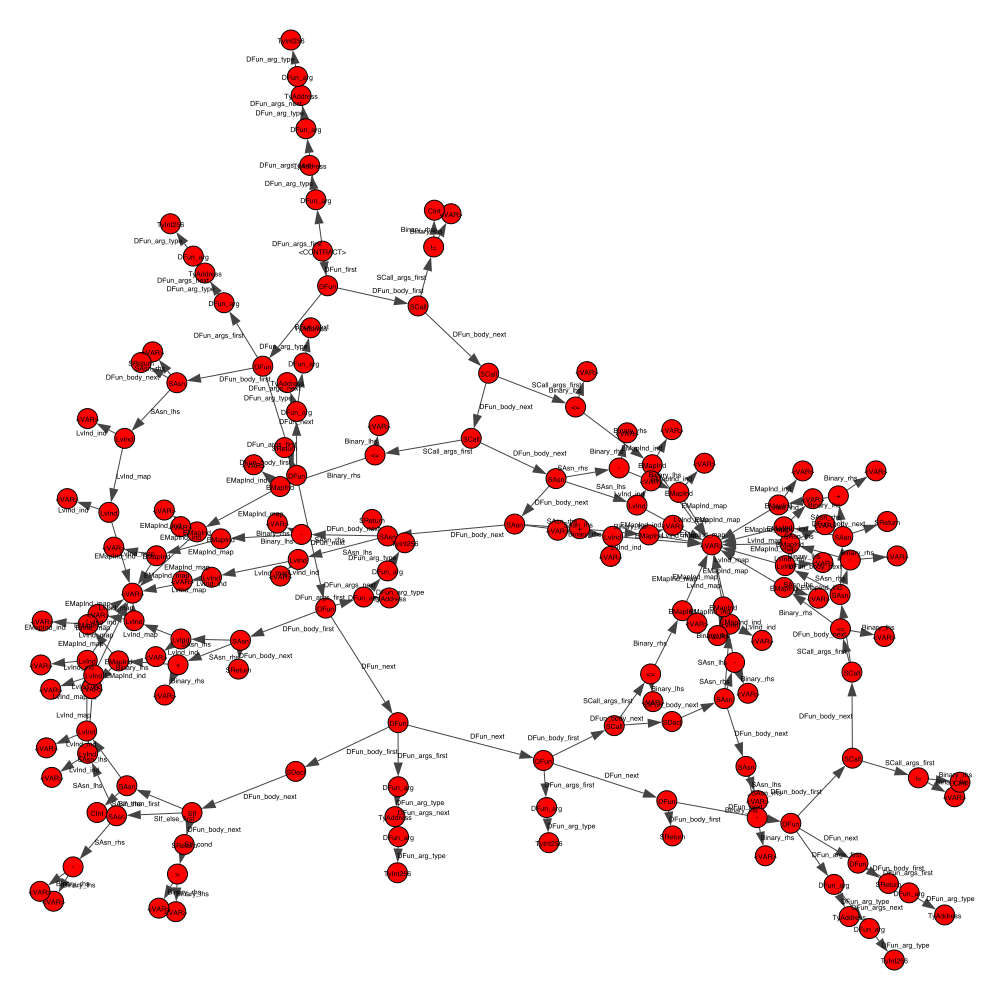

In [7]:
plot_ast(envs[0])

167 186


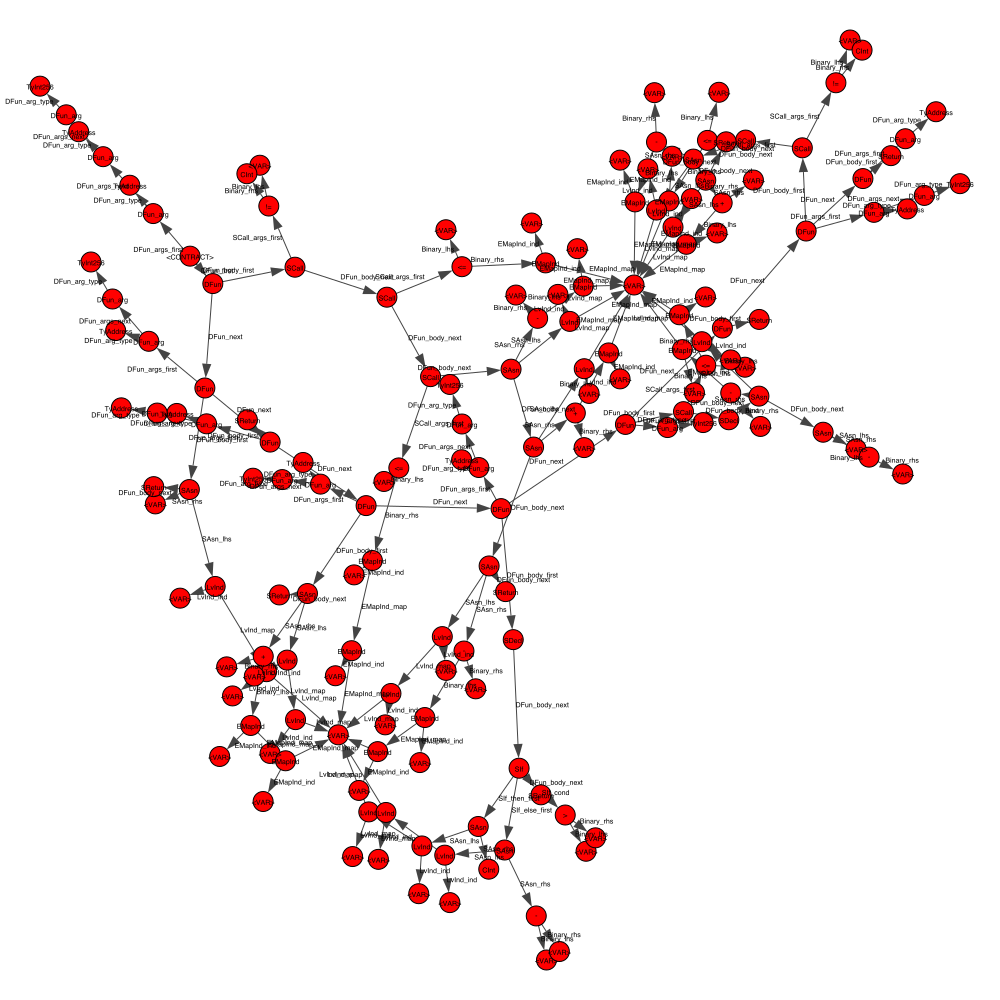

In [8]:
plot_ast(envs[1])

167 186


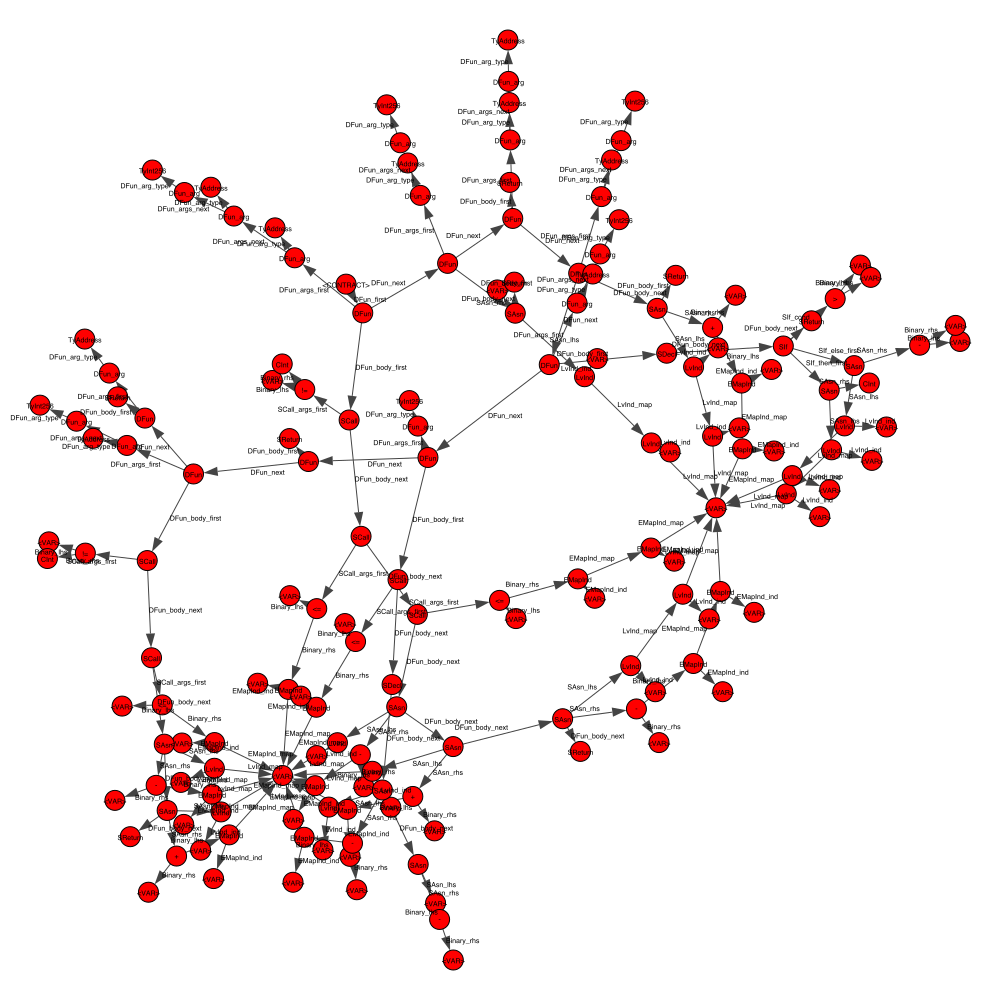

In [9]:
plot_ast(envs[2])

167 186


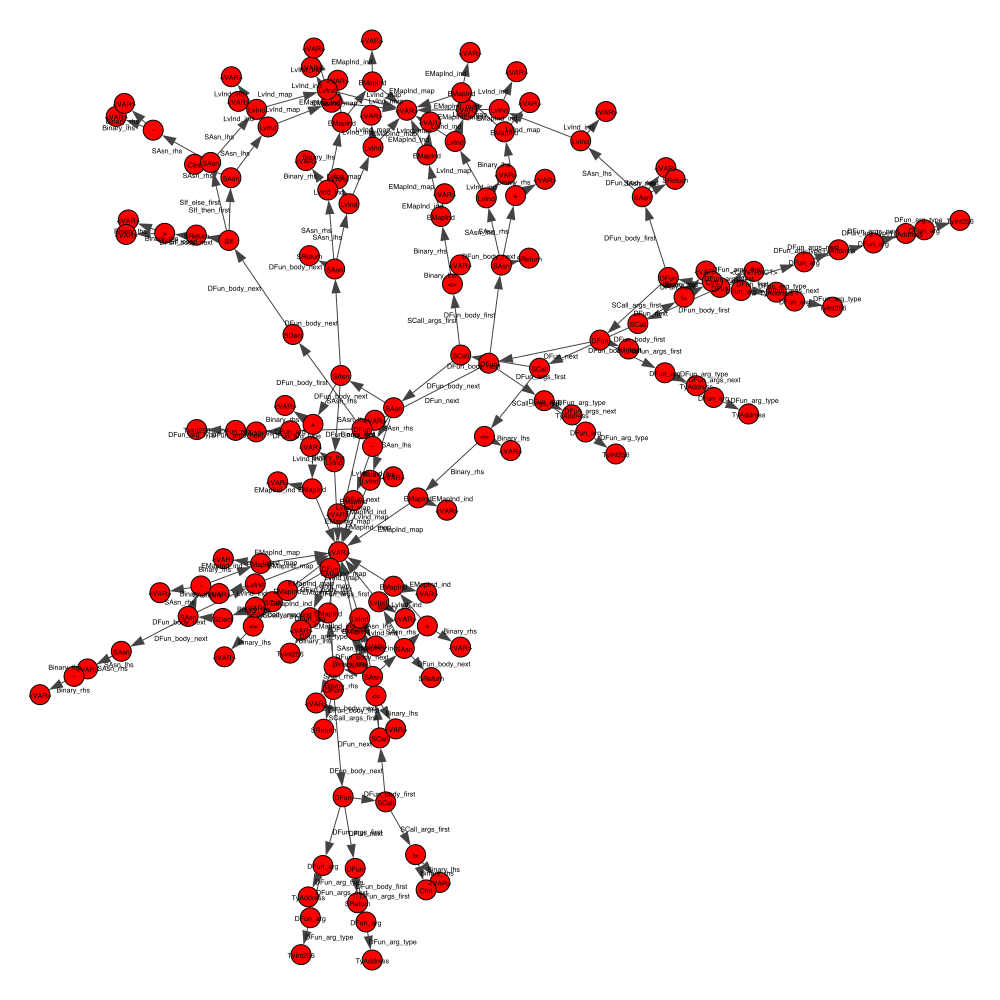

In [10]:
plot_ast(envs[3])

167 186


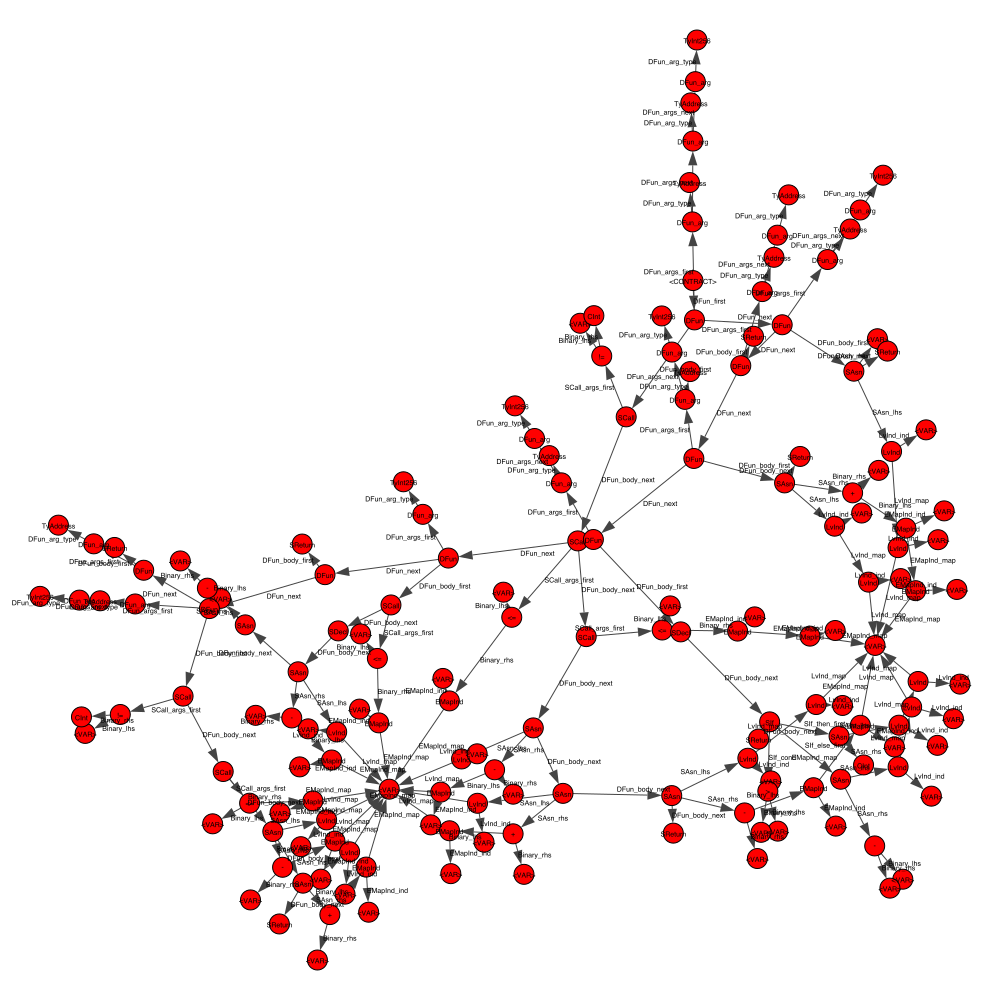

In [11]:
plot_ast(envs[4])

167 186


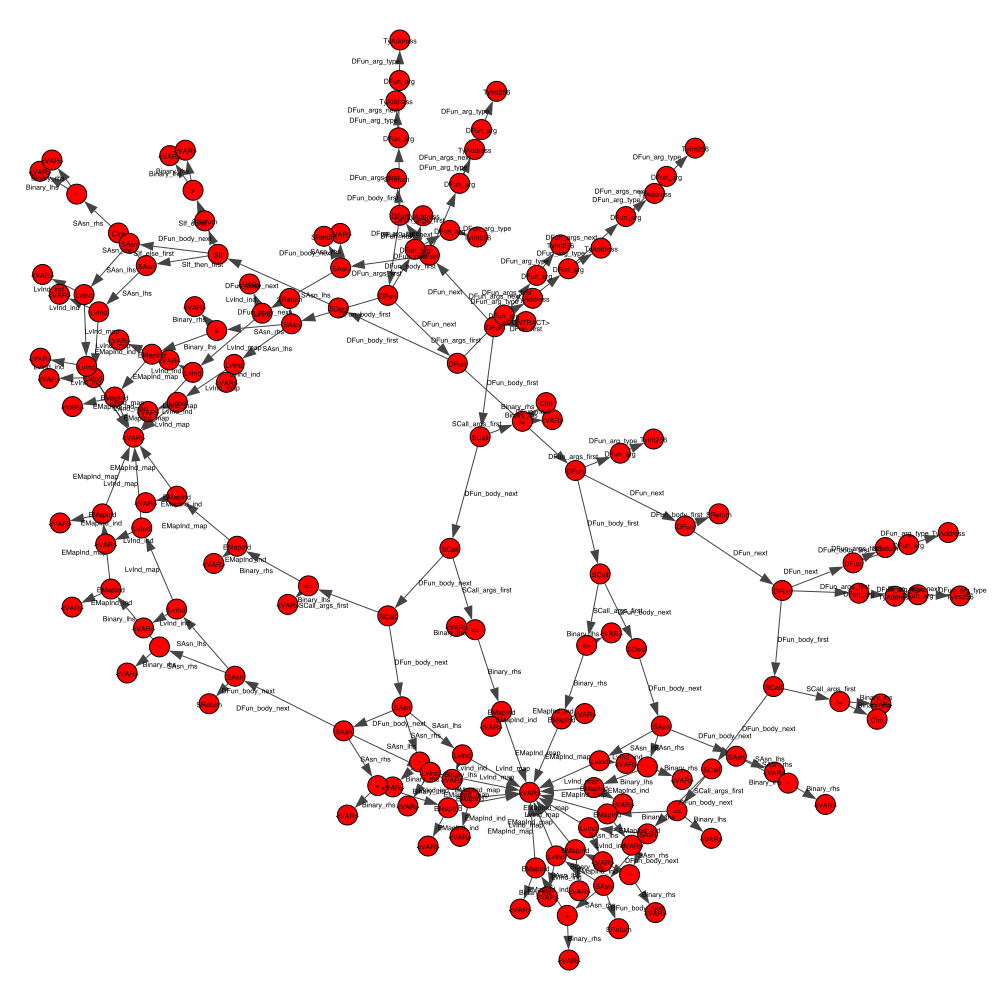

In [12]:
plot_ast(envs[5])